# IBB Intermediate Checkpoint

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import spatial

# Reading all images and saving them
image_list = []
dim = (128,128)

for folder_number in range(1,101):
    folder_name = f'{folder_number:03d}'
    
    for image_number in range(1,11):
        image_name = f'{image_number:02d}'
        image = cv2.imread("../awe/"+folder_name+"/"+image_name+".png")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image_list.append(np.array(image))
  
# Now, the variable 'image' stores the pixel values of image

In [26]:
image_list_by_class = [image_list[i:i+10] for i in range(0, len(image_list), 10)]

10


In [14]:
# Converting 2D image into a 1D vector for baseline
image_vector_list = []

for image in image_list:
    image_vector_list.append(np.ravel(image))


### LBP feature extractors

In [15]:
# Baseline LBP 

# Receives an image vector and the dimension of the LBP local window 
# Returns the image feature vector
def baselineLBP(image, dimLBP):
    radius = int((dimLBP - 1)/2)
    matrix_divided = []
    matrixLBP = []
    feature_vector = []
    
    # Add padding to a picture that is not divisible by the dimension of the LBP feature extraction matrix
    numberOfPadding = dimLBP - (image.shape[0] % dimLBP)
    image = cv2.copyMakeBorder(image, 0, numberOfPadding, 0, numberOfPadding, cv2.BORDER_CONSTANT, 0) 
    
    for width in range(radius, image.shape[0], dimLBP):
        for height in range(radius, image.shape[1], dimLBP):

            # Builds LBP feature extraction matrix
            m = [[image[width-radius][height-radius], image[width][height-radius], image[width+radius][height-radius]],
                        [image[width-radius][height], image[width][height], image[width+radius][height]],
                        [image[width-radius][height+radius], image[width][height+radius], image[width+radius][height+radius]]]
            matrix_divided.append(m)
            
            # Converts values in the extraction matrix to binary (if element < central element then 0 else 1)
            m2 = [[0 if m[row][element] < m[1][1] else 1 for element in range(0, 3)] for row in range(0, 3)] 
            matrixLBP.append(m2)
            
            # Building the LBP values (clockwise) and add them to the feature vector
            value = 1*m2[0][0] + 2*m2[0][1] + 4*m2[0][2] + 8*m2[1][2] + 16*m2[2][2] + 32*m2[2][1] + 64*m2[2][0] + 128*m2[1][0]
            feature_vector.append(value)
    
    return feature_vector

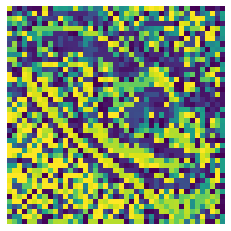

In [21]:
result = baselineLBP(image_list[0], 3)
show_feature_vector(result)

# cosine_similarity(image_list[0].ravel(), result)

In [17]:
# Overlapping LBP 

# Receives an image vector and the dimension of the LBP local window 
# Returns the [image feature vector, binary
def overlappingLBP(image, dimLBP):
    radius = int((dimLBP - 1)/2)
    matrix_divided = []
    matrixLBP = []
    feature_vector = []
    
    # Add padding to a picture that is not divisible by the dimension of the LBP feature extraction matrix
    numberOfPadding = dimLBP - (image.shape[0] % dimLBP)
    image = cv2.copyMakeBorder(image, 0, numberOfPadding, 0, numberOfPadding, cv2.BORDER_CONSTANT, 0) 
    
    # Changing the step of the for loops from the dimention of the LBP window to 1 makes the LBP window overlap
    for width in range(radius, image.shape[0]-(radius+1), 1):
        for height in range(radius, image.shape[1]-(radius+1), 1):
            
            # Builds LBP feature extraction matrix
            m = [[image[width-radius][height-radius], image[width][height-radius], image[width+radius][height-radius]],
                        [image[width-radius][height], image[width][height], image[width+radius][height]],
                        [image[width-radius][height+radius], image[width][height+radius], image[width+radius][height+radius]]]
            matrix_divided.append(m)
            
            # Converts values in the extraction matrix to binary (if element < central element then 0 else 1)
            m2 = [[0 if m[row][element] < m[1][1] else 1 for element in range(0, 3)] for row in range(0, 3)] 
            matrixLBP.append(m2)
            
            # Building the LBP values (clockwise) and add them to the feature vector
            value = 1*m2[0][0] + 2*m2[0][1] + 4*m2[0][2] + 8*m2[1][2] + 16*m2[2][2] + 32*m2[2][1] + 64*m2[2][0] + 128*m2[1][0]
            feature_vector.append(value)
    
    return feature_vector

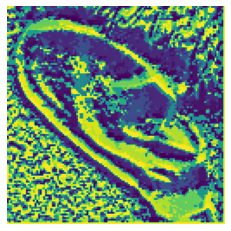

In [18]:
result = overlappingLBP(image_list[0], 7)
show_feature_vector(result)

In [19]:
# Uniform LBP 

# Receives an image vector and the dimension of the LBP local window 
# Returns the uniform image feature vector
def uniformLBP(image, dimLBP):
    radius = int((dimLBP - 1)/2)
    matrix_divided = []
    matrixLBP = []
    feature_vector = []
    
    # Add padding to a picture that is not divisible by the dimension of the LBP feature extraction matrix
    numberOfPadding = dimLBP - (image.shape[0] % dimLBP)
    image = cv2.copyMakeBorder(image, 0, numberOfPadding, 0, numberOfPadding, cv2.BORDER_CONSTANT, 0) 
    
    for width in range(radius, image.shape[0], dimLBP):
        for height in range(radius, image.shape[1], dimLBP):
            
            # Builds LBP feature extraction matrix
            m = [[image[width-radius][height-radius], image[width][height-radius], image[width+radius][height-radius]],
                        [image[width-radius][height], image[width][height], image[width+radius][height]],
                        [image[width-radius][height+radius], image[width][height+radius], image[width+radius][height+radius]]]
            matrix_divided.append(m)
            
            # Converts values in the extraction matrix to binary (if element < central element then 0 else 1)
            m2 = [[0 if m[row][element] < m[1][1] else 1 for element in range(0, 3)] for row in range(0, 3)] 
            matrixLBP.append(m2)
            
            # Build uniform binary list (clockwise)
            uniform_binary_list = [m2[0][0], m2[0][1], m2[0][2], m2[1][2], m2[2][2], m2[2][1], m2[2][0], m2[1][0]]
            
            # uniform_binary_list = 
            uniform_binary_list.sort(reverse=False) 
            
            # Building the LBP values (clockwise) and add them to the feature vector            
            value = 1*uniform_binary_list[0] + 2*uniform_binary_list[1] + 4*uniform_binary_list[2] + 8*uniform_binary_list[3] + 16*uniform_binary_list[4] + 32*uniform_binary_list[5] + 64*uniform_binary_list[6] + 128*uniform_binary_list[7]
            feature_vector.append(value)
    
    return feature_vector

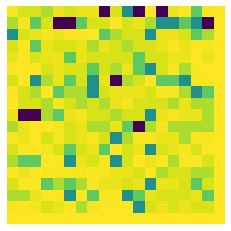

In [20]:
result = uniformLBP(image_list[0], 7)
show_feature_vector(result)

### Rank-1

In [68]:
def precompute_all_averages_pixel_by_pixel():
    all_averages_pre_computed = [np.mean(image_list_by_class[i], axis=0) for i in range(len(image_list_by_class))]
    return all_averages_pre_computed
# print(all_averages_pre_computed)

In [96]:
# chosen_image_index between 0 and 1000
def rank_one(chosen_image_index, func_precompute_averages, func_average):
    class_index = math.floor(chosen_image_index / 100)
    chosen_image_index_processed = (chosen_image_index % 100)

    all_averages_pre_computed = func_precompute_averages()
    all_averages_pre_computed[class_index] = func_average(class_index, chosen_image_index_processed)

    print(np.ravel(image_list[chosen_image_index]))
    print(np.ravel(all_averages_pre_computed[0]))
    #teste = all_averages_pre_computed[0]
    #print(all_averages_pre_computed[0])
    
    cosine_similarity_list = [(1 - spatial.distance.cosine(np.ravel(image_list[chosen_image_index]), np.ravel(all_averages_pre_computed[i]))) for i in range(len(all_averages_pre_computed))]
    chosen_class = cosine_similarity_list.index(max(cosine_similarity_list))

    
    # print(all_averages_pre_computed[class_index])
    #[image_list[i] for i in range(len(image_list)) if i != image_index]
    #[[ for j in range(image_list[i]) ] for i in range(len(image_list)) if i != image_index]
    return cosine_similarity_list
    #return teste

In [67]:
def compute_average_of_class_pixel_by_pixel(class_number, image_index_to_remove):
    image_list_processed = np.delete(image_list_by_class[class_number], image_index_to_remove, axis=0)
    updated_average = np.mean(image_list_processed, axis=0)
    return updated_average

In [97]:
# print(len(rank_one(0, precompute_all_averages_pixel_by_pixel, compute_average_of_class_pixel_by_pixel)))
test = rank_one(0, precompute_all_averages_pixel_by_pixel, compute_average_of_class_pixel_by_pixel)
print(test)
print(test.index(max(test)) + 1)
# compute_average_of_class(0, 0)
# image_list_by_class[0]
# np.delete(image_list_by_class[0], 0, axis=0)

[193 196 199 ... 121 121 118]
[ 67.33333333  66.77777778  65.44444444 ... 136.66666667 137.55555556
 138.33333333]
[-11.674205773700093, -11.786614581857076, -11.398421341938572, -11.736329719775558, -11.320505412413151, -11.641279574069781, -11.751380211347746, -11.221296780045085, -11.519688997318852, -11.890715053685605, -11.474127997816952, -11.321244091862724, -11.907453265073007, -11.053493109694427, -11.506749430255594, -11.547345303831076, -11.69043196564721, -11.568252268144219, -11.290300629165861, -11.542013928605298, -11.31265152313311, -11.463082137225902, -11.800590497647365, -11.820836907856371, -11.655980827745317, -11.747061801604513, -12.002494495522505, -11.651273886737195, -11.676544964140877, -11.344256813357541, -11.927465509569178, -11.757470218349809, -11.757787266512423, -11.541025715210042, -11.856116245191089, -11.79464725650209, -11.50069717243207, -11.526475841320405, -11.800136007009648, -11.697580835668946, -11.350295291573984, -11.53439319624025, -11.688

### Utility functions

In [11]:
def build_matrix_from_list(list):
    dim = int(math.sqrt(len(list)))
    list = np.array(list)
    matrix = []

    while list.size != 0:
        matrix.append(list[:dim])
        list = list[dim:]
    
    return matrix

In [5]:
def show_feature_vector(feature_vector):
    # x = np.array(feature_vector)
    # dim = int(math.sqrt(len(feature_vector)))
    matrix = build_matrix_from_list(feature_vector)

    image = np.array(matrix, copy=False) / 255.0
    plt.imshow(image) 
    plt.axis('off')
    plt.show()

In [ ]:
def cosine_similarity(list_1, list_2):
    result = 1 - spatial.distance.cosine(list_1, list_2)
    return result


In [ ]:
def buildUniformLBPFeatureVector(binary_vector):
    feature_vector = []
    #cars.sort(reverse=True) 
    
    for m in binary_matrix_list:
        # Building the LBP values (clockwise) and add them to the feature vector
        value = 1*m[0][0] + 2*m[0][1] + 4*m[0][2] + 8*m[1][2] + 16*m[2][2] + 32*m[2][1] + 64*m[2][0] + 128*m[1][0]
        feature_vector.append(value)
        
    return feature_vector

In [ ]:
def buildLBPFeatureVector(binary_matrix_list):
    feature_vector = []
    # binary_matrix_list.flatten()
    for m in binary_matrix_list:
        # fm = flattenLBPMatrix(m)
        
        
        # Building the LBP values (clockwise) and add them to the feature vector
        value = 1*fm[0] + 2*m[0][1] + 4*m[0][2] + 8*m[1][2] + 16*m[2][2] + 32*m[2][1] + 64*m[2][0] + 128*m[1][0]
        feature_vector.append(value)
        
    return feature_vector

In [ ]:
# Deleting the central one but not flattening clockwise yet
def flattenLBPMatrix(matrix):
    dimension = len(matrix[0])
    center_coord = int((dimension-1)/2)
    flattened_list = []
    
    for row in range(0, dimension):
        for column in range(0, dimension):
            flattened_list.append(matrix[row][column])
            
    central_element = int((len(flattened_list) - len(flattened_list) % 2)/2)
    flattened_list.pop(central_element)
    
    return flattened_list